## Load data

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd

In [ ]:
train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Analytics Vidhya/digit recognizer/train_converted.csv')
test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Analytics Vidhya/digit recognizer/test_converted_2.csv')

print(train.shape, test.shape)

(49000, 785) (21000, 784)


## Explore the data

In [ ]:
train_images = train.iloc[:,:-1]
train_labels = train.iloc[:,-1]
print(train_images.shape, train_labels.shape)

(49000, 784) (49000,)


In [ ]:
train_images = train_images.values
train_images = train_images.reshape(49000, 28, 28)
train_images.shape

(49000, 28, 28)

In [ ]:
test_images = test.values
test_images = test_images.reshape(21000, 28, 28)
test_images.shape

(21000, 28, 28)

In [ ]:
train_labels = train_labels.values
train_labels

array([4, 9, 1, ..., 9, 3, 0])

## Preprocess the data

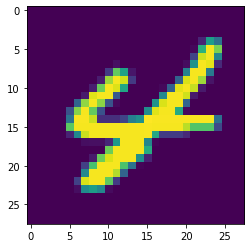

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.imshow(train_images[0])
plt.grid(False)
plt.show()

In [ ]:
#Scale the values
train_images = train_images / 255.0

test_images = test_images / 255.0

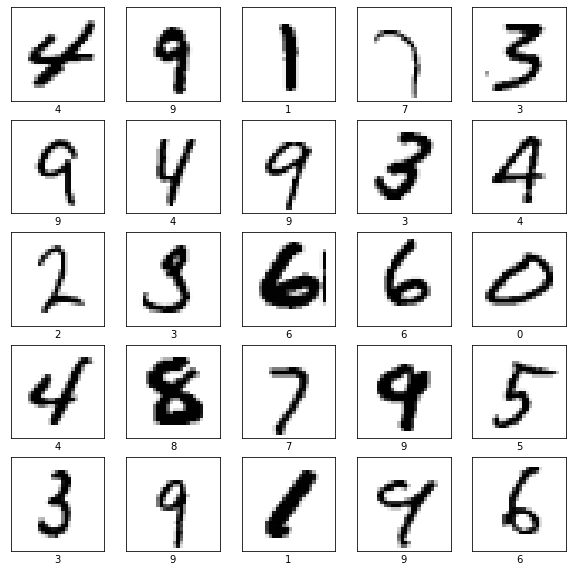

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

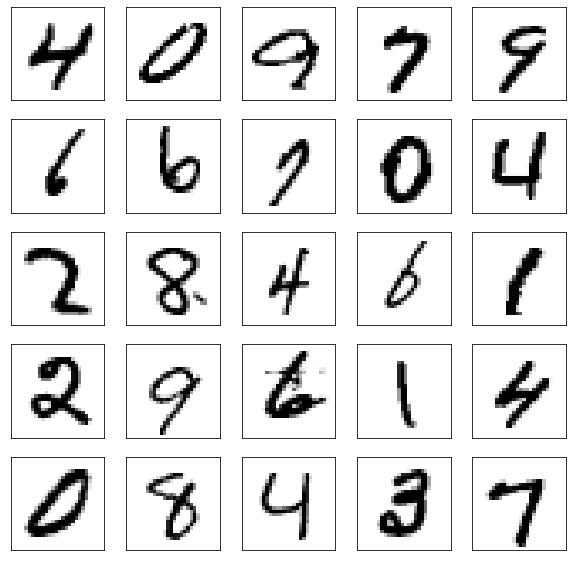

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
plt.show()

## Build model - 1

### Setup layers

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

### Compile model

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Train model

In [ ]:
model.fit(train_images, train_labels, epochs=10, validation_split=0.2, batch_size=500)

Epoch 1/10
79/79 [==============================] - 1s 9ms/step - loss: 1.7855 - accuracy: 0.7704 - val_loss: 1.6083 - val_accuracy: 0.8880
Epoch 2/10
79/79 [==============================] - 1s 7ms/step - loss: 1.5794 - accuracy: 0.9073 - val_loss: 1.5717 - val_accuracy: 0.9109
Epoch 3/10
79/79 [==============================] - 1s 7ms/step - loss: 1.5565 - accuracy: 0.9220 - val_loss: 1.5553 - val_accuracy: 0.9199
Epoch 4/10
79/79 [==============================] - 1s 7ms/step - loss: 1.5437 - accuracy: 0.9315 - val_loss: 1.5457 - val_accuracy: 0.9276
Epoch 5/10
79/79 [==============================] - 1s 7ms/step - loss: 1.5344 - accuracy: 0.9384 - val_loss: 1.5383 - val_accuracy: 0.9334
Epoch 6/10
79/79 [==============================] - 1s 7ms/step - loss: 1.5275 - accuracy: 0.9450 - val_loss: 1.5322 - val_accuracy: 0.9377
Epoch 7/10
79/79 [==============================] - 1s 7ms/step - loss: 1.5214 - accuracy: 0.9496 - val_loss: 1.5262 - val_accuracy: 0.9441
Epoch 8/10
79/79 [==

### Evaluating training accuracy

In [ ]:
train_loss, train_acc = model.evaluate(train_images,  train_labels, verbose=2)

print('\nTraining accuracy:', train_acc)

1532/1532 - 1s - loss: 1.5079 - accuracy: 0.9608

Training accuracy: 0.9608163237571716


### Making predictions

In [ ]:
predictions = model.predict(test_images)

In [ ]:
predictions[0]

array([1.2136163e-13, 5.3315939e-20, 2.6478003e-13, 1.0114162e-17,
       1.0000000e+00, 4.4988382e-10, 3.6604958e-10, 3.0988000e-13,
       5.2081361e-09, 3.6504037e-08], dtype=float32)

In [ ]:
np.argmax(predictions[0])

4

In [ ]:
test_labels = []
for i in range(len(predictions)):
  test_labels.append(np.argmax(predictions[i]))

In [ ]:
len(test_labels)

21000

### Verify the predictions

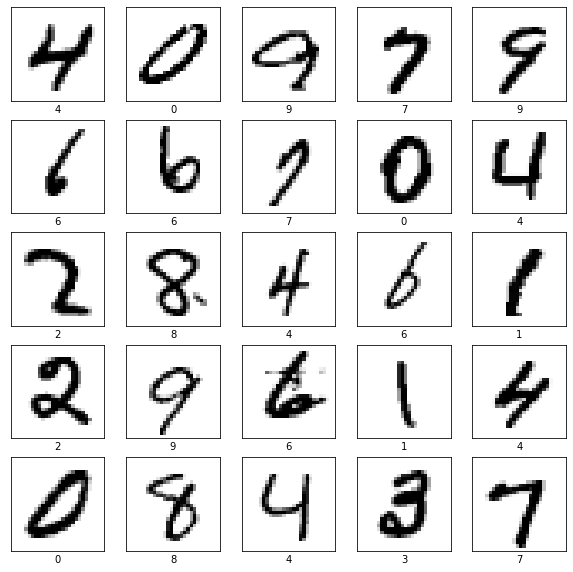

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(test_labels[i])
plt.show()

### Export the predictions

In [ ]:
test_file_1 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Analytics Vidhya/digit recognizer/Test.csv')
test_file_1['label'] = test_labels
test_file_1.head()

,filename,label
0,49000.png,4
1,49001.png,0
2,49002.png,9
3,49003.png,7
4,49004.png,9


In [ ]:
test_file_1.to_csv('Test File 1.csv', index=False)

## Build model - 2

### Setup layers

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

### Compile model

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Train model

In [ ]:
model.fit(train_images, train_labels, epochs=10, validation_split=0.2, batch_size=500)

Epoch 1/10
79/79 [==============================] - 1s 11ms/step - loss: 1.8115 - accuracy: 0.7002 - val_loss: 1.6391 - val_accuracy: 0.8313
Epoch 2/10
79/79 [==============================] - 1s 8ms/step - loss: 1.6208 - accuracy: 0.8478 - val_loss: 1.6173 - val_accuracy: 0.8502
Epoch 3/10
79/79 [==============================] - 1s 8ms/step - loss: 1.6069 - accuracy: 0.8598 - val_loss: 1.6073 - val_accuracy: 0.8581
Epoch 4/10
79/79 [==============================] - 1s 8ms/step - loss: 1.5983 - accuracy: 0.8664 - val_loss: 1.6010 - val_accuracy: 0.8629
Epoch 5/10
79/79 [==============================] - 1s 8ms/step - loss: 1.5913 - accuracy: 0.8728 - val_loss: 1.5943 - val_accuracy: 0.8700
Epoch 6/10
79/79 [==============================] - 1s 8ms/step - loss: 1.5663 - accuracy: 0.8997 - val_loss: 1.5276 - val_accuracy: 0.9392
Epoch 7/10
79/79 [==============================] - 1s 8ms/step - loss: 1.5117 - accuracy: 0.9554 - val_loss: 1.5163 - val_accuracy: 0.9498
Epoch 8/10
79/79 [=

### Evaluating training accuracy

In [ ]:
train_loss, train_acc = model.evaluate(train_images,  train_labels, verbose=2)

print('\nTraining accuracy:', train_acc)

1532/1532 - 1s - loss: 1.4941 - accuracy: 0.9706

Training accuracy: 0.9705918431282043


### Making predictions

In [ ]:
predictions = model.predict(test_images)

In [ ]:
np.argmax(predictions[0])

4

In [ ]:
test_labels = []
for i in range(len(predictions)):
  test_labels.append(np.argmax(predictions[i]))

### Verify the predictions

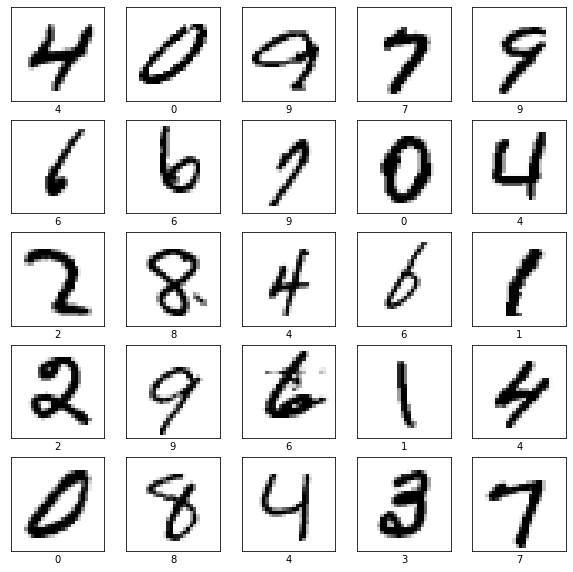

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(test_labels[i])
plt.show()

### Export the predictions

In [ ]:
test_file_2 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Analytics Vidhya/digit recognizer/Test.csv')
test_file_2['label'] = test_labels
test_file_2.head()

,filename,label
0,49000.png,4
1,49001.png,0
2,49002.png,9
3,49003.png,7
4,49004.png,9


In [ ]:
test_file_2.to_csv('Test File 2.csv', index=False)

## Build Model 3 - Hyperparameters with regularization

In [ ]:
!pip install -q -U keras-tuner

import kerastuner as kt
import IPython

     |████████████████████████████████| 61kB 1.1MB/s 


In [ ]:
def model_builder(hp):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(28, 28)))
  model.add(keras.layers.BatchNormalization())
  
  #Tune the rate for Dropout regularization
  #Choose an optimal value from 0.1, 0.2, 0.3
  hp_dropout_rate = hp.Choice('rate', values=[0.1, 0.2, 0.3])

  # Tune the number of units in the first two Dense layers
  # Choose an optimal value between 62-1024
  hp_units = hp.Int('units', min_value = 64, max_value = 1024, step = 32)
  model.add(keras.layers.Dense(units = hp_units, activation = 'relu'))
  model.add(keras.layers.Dense(units=hp_units, activation='relu'))
  model.add(keras.layers.Dropout(rate=hp_dropout_rate))
  model.add(keras.layers.Dense(10, activation='softmax'))

  # Tune the learning rate for the optimizer 
  # Choose an optimal value from 0.01, 0.001, or 0.0001
  hp_learning_rate = hp.Choice('learning_rate', values = [1e-2, 1e-3, 1e-4]) 
  
  model.compile(optimizer = keras.optimizers.Adam(learning_rate = hp_learning_rate),
                loss = keras.losses.SparseCategoricalCrossentropy(from_logits = True), 
                metrics = ['accuracy'])
  
  return model

In [ ]:
tuner = kt.Hyperband(model_builder,
                     objective = 'val_accuracy', 
                     max_epochs = 10,
                     factor = 3,
                     directory = '/content/drive/My Drive/Colab Notebooks/100daysdl',
                     project_name = 'Day 40 - KT Digit Classification with regularization')

In [ ]:
tuner.search(train_images, train_labels, 
             epochs = 10, 
             validation_split = 0.2,
             batch_size = 500)

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials = 1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")

Epoch 1/2
79/79 [==============================] - 6s 72ms/step - loss: 1.9080 - accuracy: 0.5517 - val_loss: 1.9308 - val_accuracy: 0.5302
Epoch 2/2
79/79 [==============================] - 6s 71ms/step - loss: 1.9243 - accuracy: 0.5368 - val_loss: 1.9872 - val_accuracy: 0.4740


Epoch 1/2
79/79 [==============================] - 2s 20ms/step - loss: 1.7485 - accuracy: 0.7422 - val_loss: 1.6591 - val_accuracy: 0.8591
Epoch 2/2
79/79 [==============================] - 1s 18ms/step - loss: 1.5557 - accuracy: 0.9121 - val_loss: 1.5591 - val_accuracy: 0.9204


Epoch 1/2
79/79 [==============================] - 10s 130ms/step - loss: 1.5873 - accuracy: 0.8801 - val_loss: 1.5479 - val_accuracy: 0.9249
Epoch 2/2
79/79 [==============================] - 11s 135ms/step - loss: 1.5150 - accuracy: 0.9474 - val_loss: 1.5152 - val_accuracy: 0.9493


Epoch 1/2
79/79 [==============================] - 6s 71ms/step - loss: 1.8856 - accuracy: 0.6613 - val_loss: 1.8417 - val_accuracy: 0.8261
Epoch 2/2
79/79 [==============================] - 5s 69ms/step - loss: 1.5953 - accuracy: 0.8973 - val_loss: 1.6269 - val_accuracy: 0.9044


Epoch 1/2
79/79 [==============================] - 9s 113ms/step - loss: 1.5876 - accuracy: 0.8806 - val_loss: 1.5540 - val_accuracy: 0.9193
Epoch 2/2
79/79 [==============================] - 8s 106ms/step - loss: 1.5172 - accuracy: 0.9452 - val_loss: 1.5208 - val_accuracy: 0.9434


Epoch 1/2
79/79 [==============================] - 5s 67ms/step - loss: 1.9069 - accuracy: 0.6390 - val_loss: 1.8895 - val_accuracy: 0.8267
Epoch 2/2
79/79 [==============================] - 5s 65ms/step - loss: 1.6014 - accuracy: 0.8956 - val_loss: 1.6354 - val_accuracy: 0.9044


Epoch 1/2
79/79 [==============================] - 4s 56ms/step - loss: 1.6092 - accuracy: 0.8671 - val_loss: 1.5610 - val_accuracy: 0.9224
Epoch 2/2
79/79 [==============================] - 4s 55ms/step - loss: 1.5201 - accuracy: 0.9440 - val_loss: 1.5274 - val_accuracy: 0.9402


Epoch 1/2
79/79 [==============================] - 9s 116ms/step - loss: 2.0161 - accuracy: 0.4440 - val_loss: 2.0865 - val_accuracy: 0.3743
Epoch 2/2
79/79 [==============================] - 9s 115ms/step - loss: 2.0593 - accuracy: 0.4018 - val_loss: 2.0850 - val_accuracy: 0.3761


Epoch 1/2
79/79 [==============================] - 10s 123ms/step - loss: 1.7963 - accuracy: 0.7297 - val_loss: 1.7696 - val_accuracy: 0.8664
Epoch 2/2
79/79 [==============================] - 10s 124ms/step - loss: 1.5609 - accuracy: 0.9205 - val_loss: 1.5944 - val_accuracy: 0.9187


Epoch 1/2
79/79 [==============================] - 4s 46ms/step - loss: 1.6917 - accuracy: 0.7689 - val_loss: 1.7231 - val_accuracy: 0.7382
Epoch 2/2
79/79 [==============================] - 3s 43ms/step - loss: 1.7101 - accuracy: 0.7508 - val_loss: 1.6951 - val_accuracy: 0.7660


Epoch 1/2
79/79 [==============================] - 3s 42ms/step - loss: 2.0031 - accuracy: 0.5678 - val_loss: 1.9594 - val_accuracy: 0.7964
Epoch 2/2
79/79 [==============================] - 3s 40ms/step - loss: 1.6576 - accuracy: 0.8568 - val_loss: 1.6815 - val_accuracy: 0.8835


Epoch 1/2
79/79 [==============================] - 10s 130ms/step - loss: 2.0515 - accuracy: 0.4091 - val_loss: 2.0700 - val_accuracy: 0.3910
Epoch 2/2
79/79 [==============================] - 10s 123ms/step - loss: 2.0621 - accuracy: 0.3991 - val_loss: 2.1165 - val_accuracy: 0.3446


Epoch 3/4
79/79 [==============================] - 10s 133ms/step - loss: 1.5859 - accuracy: 0.8823 - val_loss: 1.5764 - val_accuracy: 0.8952
Epoch 4/4
79/79 [==============================] - 11s 134ms/step - loss: 1.5160 - accuracy: 0.9468 - val_loss: 1.5239 - val_accuracy: 0.9419


Epoch 3/4
79/79 [==============================] - 9s 110ms/step - loss: 1.5842 - accuracy: 0.8868 - val_loss: 1.5605 - val_accuracy: 0.9144
Epoch 4/4
79/79 [==============================] - 9s 109ms/step - loss: 1.5163 - accuracy: 0.9463 - val_loss: 1.5184 - val_accuracy: 0.9470


Epoch 3/4
79/79 [==============================] - 5s 59ms/step - loss: 1.6134 - accuracy: 0.8607 - val_loss: 1.5734 - val_accuracy: 0.9136
Epoch 4/4
79/79 [==============================] - 5s 59ms/step - loss: 1.5193 - accuracy: 0.9441 - val_loss: 1.5320 - val_accuracy: 0.9394


Epoch 3/4
79/79 [==============================] - 2s 20ms/step - loss: 1.7385 - accuracy: 0.7569 - val_loss: 1.6504 - val_accuracy: 0.8668
Epoch 4/4
79/79 [==============================] - 1s 18ms/step - loss: 1.5554 - accuracy: 0.9128 - val_loss: 1.5611 - val_accuracy: 0.9181


Epoch 5/10
79/79 [==============================] - 9s 113ms/step - loss: 1.5922 - accuracy: 0.8773 - val_loss: 1.5574 - val_accuracy: 0.9167
Epoch 6/10
79/79 [==============================] - 9s 108ms/step - loss: 1.5167 - accuracy: 0.9455 - val_loss: 1.5236 - val_accuracy: 0.9429
Epoch 7/10
79/79 [==============================] - 9s 111ms/step - loss: 1.5058 - accuracy: 0.9560 - val_loss: 1.5099 - val_accuracy: 0.9535
Epoch 8/10
79/79 [==============================] - 9s 110ms/step - loss: 1.4980 - accuracy: 0.9640 - val_loss: 1.5057 - val_accuracy: 0.9560
Epoch 9/10
79/79 [==============================] - 9s 108ms/step - loss: 1.4934 - accuracy: 0.9684 - val_loss: 1.5021 - val_accuracy: 0.9601
Epoch 10/10
79/79 [==============================] - 9s 112ms/step - loss: 1.4873 - accuracy: 0.9745 - val_loss: 1.4980 - val_accuracy: 0.9642


Epoch 5/10
79/79 [==============================] - 10s 133ms/step - loss: 1.5823 - accuracy: 0.8858 - val_loss: 1.5463 - val_accuracy: 0.9256
Epoch 6/10
79/79 [==============================] - 11s 136ms/step - loss: 1.5167 - accuracy: 0.9453 - val_loss: 1.5234 - val_accuracy: 0.9415
Epoch 7/10
79/79 [==============================] - 10s 132ms/step - loss: 1.5052 - accuracy: 0.9568 - val_loss: 1.5086 - val_accuracy: 0.9546
Epoch 8/10
79/79 [==============================] - 11s 134ms/step - loss: 1.4984 - accuracy: 0.9633 - val_loss: 1.5052 - val_accuracy: 0.9561
Epoch 9/10
79/79 [==============================] - 10s 127ms/step - loss: 1.4954 - accuracy: 0.9663 - val_loss: 1.5046 - val_accuracy: 0.9563
Epoch 10/10
79/79 [==============================] - 10s 129ms/step - loss: 1.4911 - accuracy: 0.9705 - val_loss: 1.4981 - val_accuracy: 0.9638


Epoch 1/4
79/79 [==============================] - 1s 16ms/step - loss: 1.7706 - accuracy: 0.7371 - val_loss: 1.6770 - val_accuracy: 0.8604
Epoch 2/4
79/79 [==============================] - 1s 15ms/step - loss: 1.5581 - accuracy: 0.9121 - val_loss: 1.5677 - val_accuracy: 0.9162
Epoch 3/4
79/79 [==============================] - 1s 15ms/step - loss: 1.5347 - accuracy: 0.9332 - val_loss: 1.5399 - val_accuracy: 0.9318
Epoch 4/4
79/79 [==============================] - 1s 15ms/step - loss: 1.5232 - accuracy: 0.9433 - val_loss: 1.5262 - val_accuracy: 0.9394


Epoch 1/4
79/79 [==============================] - 11s 136ms/step - loss: 1.5755 - accuracy: 0.8925 - val_loss: 1.5629 - val_accuracy: 0.9101
Epoch 2/4
79/79 [==============================] - 11s 138ms/step - loss: 1.5147 - accuracy: 0.9471 - val_loss: 1.5208 - val_accuracy: 0.9430
Epoch 3/4
79/79 [==============================] - 11s 141ms/step - loss: 1.5036 - accuracy: 0.9578 - val_loss: 1.5144 - val_accuracy: 0.9471
Epoch 4/4
79/79 [==============================] - 11s 138ms/step - loss: 1.4979 - accuracy: 0.9637 - val_loss: 1.5073 - val_accuracy: 0.9534


Epoch 1/4
79/79 [==============================] - 9s 120ms/step - loss: 2.0309 - accuracy: 0.4291 - val_loss: 2.1544 - val_accuracy: 0.3067
Epoch 2/4
79/79 [==============================] - 9s 117ms/step - loss: 2.0673 - accuracy: 0.3938 - val_loss: 2.1279 - val_accuracy: 0.3332
Epoch 3/4
79/79 [==============================] - 9s 117ms/step - loss: 2.0516 - accuracy: 0.4095 - val_loss: 2.0494 - val_accuracy: 0.4117
Epoch 4/4
79/79 [==============================] - 10s 123ms/step - loss: 2.0576 - accuracy: 0.4035 - val_loss: 2.1091 - val_accuracy: 0.3520


Epoch 1/4
79/79 [==============================] - 6s 81ms/step - loss: 1.9009 - accuracy: 0.5593 - val_loss: 1.9725 - val_accuracy: 0.4883
Epoch 2/4
79/79 [==============================] - 6s 79ms/step - loss: 1.9057 - accuracy: 0.5555 - val_loss: 1.9501 - val_accuracy: 0.5110
Epoch 3/4
79/79 [==============================] - 6s 82ms/step - loss: 1.9582 - accuracy: 0.5030 - val_loss: 2.0949 - val_accuracy: 0.3662
Epoch 4/4
79/79 [==============================] - 6s 79ms/step - loss: 2.0187 - accuracy: 0.4424 - val_loss: 1.9652 - val_accuracy: 0.4959


Epoch 1/4
79/79 [==============================] - 4s 49ms/step - loss: 1.6159 - accuracy: 0.8584 - val_loss: 1.5795 - val_accuracy: 0.9131
Epoch 2/4
79/79 [==============================] - 4s 50ms/step - loss: 1.5191 - accuracy: 0.9446 - val_loss: 1.5266 - val_accuracy: 0.9429
Epoch 3/4
79/79 [==============================] - 4s 50ms/step - loss: 1.5041 - accuracy: 0.9593 - val_loss: 1.5123 - val_accuracy: 0.9533
Epoch 4/4
79/79 [==============================] - 4s 48ms/step - loss: 1.4953 - accuracy: 0.9675 - val_loss: 1.5049 - val_accuracy: 0.9579


Epoch 1/4
79/79 [==============================] - 2s 31ms/step - loss: 1.6519 - accuracy: 0.8283 - val_loss: 1.5986 - val_accuracy: 0.9040
Epoch 2/4
79/79 [==============================] - 2s 30ms/step - loss: 1.5259 - accuracy: 0.9399 - val_loss: 1.5335 - val_accuracy: 0.9413
Epoch 3/4
79/79 [==============================] - 2s 31ms/step - loss: 1.5090 - accuracy: 0.9554 - val_loss: 1.5133 - val_accuracy: 0.9528
Epoch 4/4
79/79 [==============================] - 2s 31ms/step - loss: 1.5002 - accuracy: 0.9638 - val_loss: 1.5074 - val_accuracy: 0.9566


Epoch 5/10
79/79 [==============================] - 4s 55ms/step - loss: 1.6308 - accuracy: 0.8416 - val_loss: 1.5856 - val_accuracy: 0.9032
Epoch 6/10
79/79 [==============================] - 4s 53ms/step - loss: 1.5198 - accuracy: 0.9441 - val_loss: 1.5231 - val_accuracy: 0.9452
Epoch 7/10
79/79 [==============================] - 4s 54ms/step - loss: 1.5042 - accuracy: 0.9592 - val_loss: 1.5118 - val_accuracy: 0.9513
Epoch 8/10
79/79 [==============================] - 4s 49ms/step - loss: 1.4961 - accuracy: 0.9665 - val_loss: 1.5016 - val_accuracy: 0.9620
Epoch 9/10
79/79 [==============================] - 4s 50ms/step - loss: 1.4910 - accuracy: 0.9714 - val_loss: 1.5014 - val_accuracy: 0.9608
Epoch 10/10
79/79 [==============================] - 4s 53ms/step - loss: 1.4859 - accuracy: 0.9766 - val_loss: 1.4995 - val_accuracy: 0.9631


Epoch 5/10
79/79 [==============================] - 3s 34ms/step - loss: 1.6555 - accuracy: 0.8277 - val_loss: 1.5836 - val_accuracy: 0.9126
Epoch 6/10
79/79 [==============================] - 2s 30ms/step - loss: 1.5273 - accuracy: 0.9384 - val_loss: 1.5337 - val_accuracy: 0.9407
Epoch 7/10
79/79 [==============================] - 3s 33ms/step - loss: 1.5100 - accuracy: 0.9545 - val_loss: 1.5166 - val_accuracy: 0.9487
Epoch 8/10
79/79 [==============================] - 2s 29ms/step - loss: 1.5007 - accuracy: 0.9633 - val_loss: 1.5070 - val_accuracy: 0.9569
Epoch 9/10
79/79 [==============================] - 3s 33ms/step - loss: 1.4949 - accuracy: 0.9687 - val_loss: 1.5030 - val_accuracy: 0.9605
Epoch 10/10
79/79 [==============================] - 3s 34ms/step - loss: 1.4895 - accuracy: 0.9740 - val_loss: 1.5013 - val_accuracy: 0.9614


Epoch 1/10
79/79 [==============================] - 3s 44ms/step - loss: 1.7258 - accuracy: 0.7348 - val_loss: 1.7746 - val_accuracy: 0.6867
Epoch 2/10
79/79 [==============================] - 3s 43ms/step - loss: 1.7029 - accuracy: 0.7581 - val_loss: 1.7101 - val_accuracy: 0.7510
Epoch 3/10
79/79 [==============================] - 3s 41ms/step - loss: 1.6950 - accuracy: 0.7659 - val_loss: 1.6837 - val_accuracy: 0.7774
Epoch 4/10
79/79 [==============================] - 3s 41ms/step - loss: 1.7074 - accuracy: 0.7538 - val_loss: 1.7100 - val_accuracy: 0.7512
Epoch 5/10
79/79 [==============================] - 3s 40ms/step - loss: 1.7199 - accuracy: 0.7412 - val_loss: 1.7254 - val_accuracy: 0.7356
Epoch 6/10
79/79 [==============================] - 3s 38ms/step - loss: 1.7226 - accuracy: 0.7384 - val_loss: 1.7317 - val_accuracy: 0.7295
Epoch 7/10
79/79 [==============================] - 3s 37ms/step - loss: 1.7164 - accuracy: 0.7447 - val_loss: 1.7197 - val_accuracy: 0.7414
Epoch 8/10
79

Epoch 1/10
79/79 [==============================] - 5s 65ms/step - loss: 1.9256 - accuracy: 0.6338 - val_loss: 1.8741 - val_accuracy: 0.8169
Epoch 2/10
79/79 [==============================] - 5s 64ms/step - loss: 1.6123 - accuracy: 0.8849 - val_loss: 1.6419 - val_accuracy: 0.8992
Epoch 3/10
79/79 [==============================] - 5s 61ms/step - loss: 1.5667 - accuracy: 0.9140 - val_loss: 1.5759 - val_accuracy: 0.9190
Epoch 4/10
79/79 [==============================] - 5s 64ms/step - loss: 1.5477 - accuracy: 0.9273 - val_loss: 1.5506 - val_accuracy: 0.9293
Epoch 5/10
79/79 [==============================] - 5s 62ms/step - loss: 1.5356 - accuracy: 0.9373 - val_loss: 1.5361 - val_accuracy: 0.9389
Epoch 6/10
79/79 [==============================] - 5s 63ms/step - loss: 1.5281 - accuracy: 0.9434 - val_loss: 1.5285 - val_accuracy: 0.9429
Epoch 7/10
79/79 [==============================] - 5s 62ms/step - loss: 1.5215 - accuracy: 0.9491 - val_loss: 1.5231 - val_accuracy: 0.9471
Epoch 8/10
79

Epoch 1/10
79/79 [==============================] - 10s 127ms/step - loss: 1.7878 - accuracy: 0.7484 - val_loss: 1.7755 - val_accuracy: 0.8480
Epoch 2/10
79/79 [==============================] - 10s 130ms/step - loss: 1.5660 - accuracy: 0.9155 - val_loss: 1.5950 - val_accuracy: 0.9187
Epoch 3/10
79/79 [==============================] - 10s 130ms/step - loss: 1.5385 - accuracy: 0.9358 - val_loss: 1.5502 - val_accuracy: 0.9340
Epoch 4/10
79/79 [==============================] - 10s 128ms/step - loss: 1.5249 - accuracy: 0.9468 - val_loss: 1.5332 - val_accuracy: 0.9413
Epoch 5/10
79/79 [==============================] - 10s 128ms/step - loss: 1.5149 - accuracy: 0.9557 - val_loss: 1.5209 - val_accuracy: 0.9490
Epoch 6/10
79/79 [==============================] - 11s 135ms/step - loss: 1.5083 - accuracy: 0.9605 - val_loss: 1.5149 - val_accuracy: 0.9541
Epoch 7/10
79/79 [==============================] - 10s 128ms/step - loss: 1.5034 - accuracy: 0.9648 - val_loss: 1.5112 - val_accuracy: 0.9552

Epoch 1/10
79/79 [==============================] - 9s 112ms/step - loss: 2.0849 - accuracy: 0.3753 - val_loss: 2.0828 - val_accuracy: 0.3784
Epoch 2/10
79/79 [==============================] - 9s 111ms/step - loss: 2.1011 - accuracy: 0.3601 - val_loss: 2.1491 - val_accuracy: 0.3120
Epoch 3/10
79/79 [==============================] - 9s 110ms/step - loss: 2.1614 - accuracy: 0.2997 - val_loss: 2.1806 - val_accuracy: 0.2805
Epoch 4/10
79/79 [==============================] - 9s 111ms/step - loss: 2.1802 - accuracy: 0.2810 - val_loss: 2.1793 - val_accuracy: 0.2818
Epoch 5/10
79/79 [==============================] - 9s 111ms/step - loss: 2.1852 - accuracy: 0.2760 - val_loss: 2.2513 - val_accuracy: 0.2099
Epoch 6/10
79/79 [==============================] - 9s 109ms/step - loss: 2.2624 - accuracy: 0.1988 - val_loss: 2.3602 - val_accuracy: 0.1009
Epoch 7/10
79/79 [==============================] - 9s 113ms/step - loss: 2.3589 - accuracy: 0.1023 - val_loss: 2.3602 - val_accuracy: 0.1009
Epoch 

INFO:tensorflow:Oracle triggered exit

The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 832 and the optimal learning rate for the optimizer
is 0.001.



In [ ]:
# Build the model with the optimal hyperparameters and train it on the data
model = tuner.hypermodel.build(best_hps)
model.fit(train_images, train_labels, epochs = 10, validation_split = 0.2, batch_size = 500)

Epoch 1/10
79/79 [==============================] - 8s 105ms/step - loss: 1.5882 - accuracy: 0.8812 - val_loss: 1.5487 - val_accuracy: 0.9258
Epoch 2/10
79/79 [==============================] - 8s 104ms/step - loss: 1.5160 - accuracy: 0.9464 - val_loss: 1.5200 - val_accuracy: 0.9446
Epoch 3/10
79/79 [==============================] - 8s 106ms/step - loss: 1.5058 - accuracy: 0.9559 - val_loss: 1.5107 - val_accuracy: 0.9522
Epoch 4/10
79/79 [==============================] - 8s 107ms/step - loss: 1.4979 - accuracy: 0.9638 - val_loss: 1.5021 - val_accuracy: 0.9590
Epoch 5/10
79/79 [==============================] - 8s 104ms/step - loss: 1.4927 - accuracy: 0.9692 - val_loss: 1.5006 - val_accuracy: 0.9610
Epoch 6/10
79/79 [==============================] - 9s 108ms/step - loss: 1.4902 - accuracy: 0.9711 - val_loss: 1.4975 - val_accuracy: 0.9637
Epoch 7/10
79/79 [==============================] - 9s 109ms/step - loss: 1.4862 - accuracy: 0.9750 - val_loss: 1.4939 - val_accuracy: 0.9679
Epoch 

### Evaluating training accuracy

In [ ]:
train_loss, train_acc = model.evaluate(train_images,  train_labels, verbose=2)

print('\nTraining accuracy:', train_acc)

1532/1532 - 7s - loss: 1.4799 - accuracy: 0.9814

Training accuracy: 0.9813673496246338


### Making predictions

In [ ]:
predictions = model.predict(test_images)

In [ ]:
np.argmax(predictions[0])

4

In [ ]:
test_labels = []
for i in range(len(predictions)):
  test_labels.append(np.argmax(predictions[i]))

### Verify the predictions

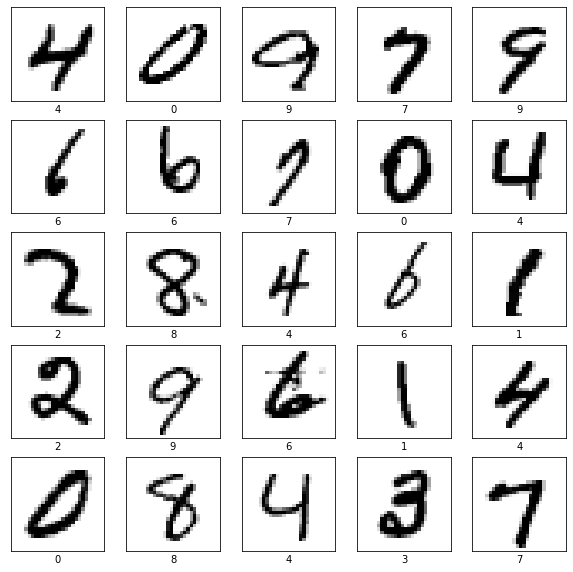

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(test_labels[i])
plt.show()

### Export the predictions

In [ ]:
test_file_4 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Analytics Vidhya/digit recognizer/Test.csv')
test_file_4['label'] = test_labels
test_file_4.head()

,filename,label
0,49000.png,4
1,49001.png,0
2,49002.png,9
3,49003.png,7
4,49004.png,9


In [ ]:
test_file_4.to_csv('Test File 4.csv', index=False)

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
dense (Dense)                (None, 832)               653120    
_________________________________________________________________
dense_1 (Dense)              (None, 832)               693056    
_________________________________________________________________
dropout (Dropout)            (None, 832)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                8330      
Total params: 1,357,642
Trainable params: 1,356,074
Non-trainable params: 1,568
__________________________________________

## Build Model 4 - Hyperparameters with regularization
no dropout

In [ ]:
!pip install -q -U keras-tuner

import kerastuner as kt
import IPython

In [ ]:
def model_builder(hp):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(28, 28)))
  model.add(keras.layers.BatchNormalization())

  # Tune the number of units in the first two Dense layers
  # Choose an optimal value between 62-1024
  hp_units = hp.Int('units', min_value = 64, max_value = 1024, step = 32)
  model.add(keras.layers.Dense(units = hp_units, activation = 'relu'))
  model.add(keras.layers.Dense(units=hp_units, activation='relu'))
  model.add(keras.layers.Dense(10, activation='softmax'))

  # Tune the learning rate for the optimizer 
  # Choose an optimal value from 0.01, 0.001, or 0.0001
  hp_learning_rate = hp.Choice('learning_rate', values = [1e-2, 1e-3, 1e-4]) 
  
  model.compile(optimizer = keras.optimizers.Adam(learning_rate = hp_learning_rate),
                loss = keras.losses.SparseCategoricalCrossentropy(from_logits = True), 
                metrics = ['accuracy'])
  
  return model

In [ ]:
tuner = kt.Hyperband(model_builder,
                     objective = 'val_accuracy', 
                     max_epochs = 10,
                     factor = 3,
                     directory = '/content/drive/My Drive/Colab Notebooks/100daysdl',
                     project_name = 'Day 40 - KT Digit Classification with regularization')

In [ ]:
tuner.search(train_images, train_labels, 
             epochs = 10, 
             validation_split = 0.2,
             batch_size = 500)

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials = 1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")

Epoch 1/2
79/79 [==============================] - 2s 28ms/step - loss: 1.6531 - accuracy: 0.8317 - val_loss: 1.6111 - val_accuracy: 0.8989
Epoch 2/2
79/79 [==============================] - 2s 27ms/step - loss: 1.5217 - accuracy: 0.9448 - val_loss: 1.5395 - val_accuracy: 0.9379


Epoch 1/2
79/79 [==============================] - 9s 120ms/step - loss: 2.0030 - accuracy: 0.4572 - val_loss: 2.1027 - val_accuracy: 0.3582
Epoch 2/2
79/79 [==============================] - 9s 114ms/step - loss: 2.0598 - accuracy: 0.4013 - val_loss: 2.0601 - val_accuracy: 0.4010


Epoch 1/2
79/79 [==============================] - 6s 81ms/step - loss: 1.5981 - accuracy: 0.8718 - val_loss: 1.5714 - val_accuracy: 0.9076
Epoch 2/2
79/79 [==============================] - 7s 84ms/step - loss: 1.5121 - accuracy: 0.9508 - val_loss: 1.5205 - val_accuracy: 0.9471


Epoch 1/2
79/79 [==============================] - 5s 69ms/step - loss: 1.5935 - accuracy: 0.8812 - val_loss: 1.5730 - val_accuracy: 0.9117
Epoch 2/2
79/79 [==============================] - 5s 66ms/step - loss: 1.5131 - accuracy: 0.9504 - val_loss: 1.5195 - val_accuracy: 0.9473


Epoch 1/2
79/79 [==============================] - 4s 52ms/step - loss: 1.9310 - accuracy: 0.6103 - val_loss: 1.8958 - val_accuracy: 0.7740
Epoch 2/2
79/79 [==============================] - 4s 49ms/step - loss: 1.6276 - accuracy: 0.8715 - val_loss: 1.6541 - val_accuracy: 0.8983


Epoch 1/2
79/79 [==============================] - 8s 96ms/step - loss: 1.5862 - accuracy: 0.8837 - val_loss: 1.5536 - val_accuracy: 0.9241
Epoch 2/2
79/79 [==============================] - 7s 94ms/step - loss: 1.5114 - accuracy: 0.9515 - val_loss: 1.5190 - val_accuracy: 0.9465


Epoch 1/2
79/79 [==============================] - 3s 38ms/step - loss: 1.6226 - accuracy: 0.8572 - val_loss: 1.5715 - val_accuracy: 0.9201
Epoch 2/2
79/79 [==============================] - 3s 38ms/step - loss: 1.5172 - accuracy: 0.9476 - val_loss: 1.5265 - val_accuracy: 0.9455


Epoch 1/2
79/79 [==============================] - 6s 71ms/step - loss: 1.5911 - accuracy: 0.8843 - val_loss: 1.5699 - val_accuracy: 0.9137
Epoch 2/2
79/79 [==============================] - 5s 69ms/step - loss: 1.5126 - accuracy: 0.9503 - val_loss: 1.5183 - val_accuracy: 0.9505


Epoch 1/2
79/79 [==============================] - 1s 19ms/step - loss: 1.7656 - accuracy: 0.7167 - val_loss: 1.6683 - val_accuracy: 0.8712
Epoch 2/2
79/79 [==============================] - 1s 18ms/step - loss: 1.5367 - accuracy: 0.9321 - val_loss: 1.5531 - val_accuracy: 0.9298


Epoch 1/2
79/79 [==============================] - 7s 93ms/step - loss: 2.0392 - accuracy: 0.4209 - val_loss: 2.1194 - val_accuracy: 0.3418
Epoch 2/2
79/79 [==============================] - 7s 90ms/step - loss: 2.0502 - accuracy: 0.4109 - val_loss: 2.0609 - val_accuracy: 0.4002


Epoch 1/2
79/79 [==============================] - 12s 154ms/step - loss: 2.0405 - accuracy: 0.4199 - val_loss: 2.2183 - val_accuracy: 0.2429
Epoch 2/2
79/79 [==============================] - 12s 149ms/step - loss: 2.2046 - accuracy: 0.2565 - val_loss: 2.2504 - val_accuracy: 0.2107


Epoch 1/2
79/79 [==============================] - 9s 112ms/step - loss: 1.8007 - accuracy: 0.7309 - val_loss: 1.7866 - val_accuracy: 0.8411
Epoch 2/2
79/79 [==============================] - 9s 114ms/step - loss: 1.5646 - accuracy: 0.9194 - val_loss: 1.6010 - val_accuracy: 0.9151


Epoch 3/4
79/79 [==============================] - 6s 71ms/step - loss: 1.5960 - accuracy: 0.8768 - val_loss: 1.5614 - val_accuracy: 0.9221
Epoch 4/4
79/79 [==============================] - 5s 69ms/step - loss: 1.5112 - accuracy: 0.9521 - val_loss: 1.5176 - val_accuracy: 0.9492


Epoch 3/4
79/79 [==============================] - 5s 68ms/step - loss: 1.5995 - accuracy: 0.8748 - val_loss: 1.5603 - val_accuracy: 0.9228
Epoch 4/4
79/79 [==============================] - 5s 66ms/step - loss: 1.5119 - accuracy: 0.9521 - val_loss: 1.5219 - val_accuracy: 0.9468


Epoch 3/4
79/79 [==============================] - 7s 84ms/step - loss: 1.5973 - accuracy: 0.8743 - val_loss: 1.5517 - val_accuracy: 0.9262
Epoch 4/4
79/79 [==============================] - 7s 83ms/step - loss: 1.5123 - accuracy: 0.9505 - val_loss: 1.5245 - val_accuracy: 0.9415


Epoch 3/4
79/79 [==============================] - 8s 96ms/step - loss: 1.5847 - accuracy: 0.8853 - val_loss: 1.5688 - val_accuracy: 0.9104
Epoch 4/4
79/79 [==============================] - 8s 96ms/step - loss: 1.5116 - accuracy: 0.9511 - val_loss: 1.5178 - val_accuracy: 0.9479


Epoch 5/10
79/79 [==============================] - 6s 70ms/step - loss: 1.5964 - accuracy: 0.8786 - val_loss: 1.5583 - val_accuracy: 0.9259
Epoch 6/10
79/79 [==============================] - 6s 70ms/step - loss: 1.5123 - accuracy: 0.9511 - val_loss: 1.5173 - val_accuracy: 0.9490
Epoch 7/10
79/79 [==============================] - 5s 69ms/step - loss: 1.5006 - accuracy: 0.9622 - val_loss: 1.5097 - val_accuracy: 0.9544
Epoch 8/10
79/79 [==============================] - 6s 70ms/step - loss: 1.4919 - accuracy: 0.9705 - val_loss: 1.5073 - val_accuracy: 0.9554
Epoch 9/10
79/79 [==============================] - 5s 69ms/step - loss: 1.4877 - accuracy: 0.9744 - val_loss: 1.4986 - val_accuracy: 0.9631
Epoch 10/10
79/79 [==============================] - 6s 70ms/step - loss: 1.4847 - accuracy: 0.9773 - val_loss: 1.4968 - val_accuracy: 0.9652


Epoch 5/10
79/79 [==============================] - 8s 97ms/step - loss: 1.5826 - accuracy: 0.8873 - val_loss: 1.5553 - val_accuracy: 0.9216
Epoch 6/10
79/79 [==============================] - 8s 97ms/step - loss: 1.5098 - accuracy: 0.9527 - val_loss: 1.5196 - val_accuracy: 0.9453
Epoch 7/10
79/79 [==============================] - 8s 95ms/step - loss: 1.4985 - accuracy: 0.9635 - val_loss: 1.5127 - val_accuracy: 0.9498
Epoch 8/10
79/79 [==============================] - 7s 93ms/step - loss: 1.4939 - accuracy: 0.9679 - val_loss: 1.5042 - val_accuracy: 0.9574
Epoch 9/10
79/79 [==============================] - 8s 96ms/step - loss: 1.4899 - accuracy: 0.9717 - val_loss: 1.5047 - val_accuracy: 0.9572
Epoch 10/10
79/79 [==============================] - 7s 95ms/step - loss: 1.4848 - accuracy: 0.9769 - val_loss: 1.4966 - val_accuracy: 0.9647


Epoch 1/4
79/79 [==============================] - 7s 84ms/step - loss: 1.9131 - accuracy: 0.5469 - val_loss: 2.0047 - val_accuracy: 0.4559
Epoch 2/4
79/79 [==============================] - 7s 83ms/step - loss: 1.9180 - accuracy: 0.5430 - val_loss: 1.9824 - val_accuracy: 0.4788
Epoch 3/4
79/79 [==============================] - 7s 82ms/step - loss: 1.9567 - accuracy: 0.5044 - val_loss: 1.9366 - val_accuracy: 0.5245
Epoch 4/4
79/79 [==============================] - 6s 77ms/step - loss: 1.9774 - accuracy: 0.4838 - val_loss: 2.0287 - val_accuracy: 0.4324


Epoch 1/4
79/79 [==============================] - 10s 126ms/step - loss: 1.7632 - accuracy: 0.7917 - val_loss: 1.7528 - val_accuracy: 0.8654
Epoch 2/4
79/79 [==============================] - 10s 129ms/step - loss: 1.5564 - accuracy: 0.9242 - val_loss: 1.5947 - val_accuracy: 0.9217
Epoch 3/4
79/79 [==============================] - 10s 131ms/step - loss: 1.5302 - accuracy: 0.9443 - val_loss: 1.5474 - val_accuracy: 0.9377
Epoch 4/4
79/79 [==============================] - 10s 131ms/step - loss: 1.5169 - accuracy: 0.9547 - val_loss: 1.5284 - val_accuracy: 0.9464


Epoch 1/4
79/79 [==============================] - 7s 87ms/step - loss: 1.8235 - accuracy: 0.7307 - val_loss: 1.8057 - val_accuracy: 0.8552
Epoch 2/4
79/79 [==============================] - 7s 93ms/step - loss: 1.5708 - accuracy: 0.9153 - val_loss: 1.6116 - val_accuracy: 0.9159
Epoch 3/4
79/79 [==============================] - 7s 85ms/step - loss: 1.5392 - accuracy: 0.9374 - val_loss: 1.5569 - val_accuracy: 0.9309
Epoch 4/4
79/79 [==============================] - 7s 88ms/step - loss: 1.5238 - accuracy: 0.9499 - val_loss: 1.5358 - val_accuracy: 0.9395


Epoch 1/4
79/79 [==============================] - 4s 48ms/step - loss: 1.6099 - accuracy: 0.8667 - val_loss: 1.5748 - val_accuracy: 0.9138
Epoch 2/4
79/79 [==============================] - 3s 43ms/step - loss: 1.5147 - accuracy: 0.9488 - val_loss: 1.5224 - val_accuracy: 0.9480
Epoch 3/4
79/79 [==============================] - 4s 46ms/step - loss: 1.5000 - accuracy: 0.9637 - val_loss: 1.5149 - val_accuracy: 0.9501
Epoch 4/4
79/79 [==============================] - 3s 43ms/step - loss: 1.4929 - accuracy: 0.9704 - val_loss: 1.5054 - val_accuracy: 0.9567


Epoch 1/4
79/79 [==============================] - 9s 113ms/step - loss: 1.8080 - accuracy: 0.7309 - val_loss: 1.7792 - val_accuracy: 0.8646
Epoch 2/4
79/79 [==============================] - 9s 111ms/step - loss: 1.5647 - accuracy: 0.9191 - val_loss: 1.6007 - val_accuracy: 0.9185
Epoch 3/4
79/79 [==============================] - 8s 108ms/step - loss: 1.5344 - accuracy: 0.9410 - val_loss: 1.5524 - val_accuracy: 0.9351
Epoch 4/4
79/79 [==============================] - 9s 110ms/step - loss: 1.5204 - accuracy: 0.9520 - val_loss: 1.5314 - val_accuracy: 0.9445


Epoch 1/4
79/79 [==============================] - 8s 97ms/step - loss: 1.8986 - accuracy: 0.5619 - val_loss: 1.9631 - val_accuracy: 0.4980
Epoch 2/4
79/79 [==============================] - 7s 95ms/step - loss: 1.9477 - accuracy: 0.5134 - val_loss: 1.9485 - val_accuracy: 0.5126
Epoch 3/4
79/79 [==============================] - 7s 90ms/step - loss: 1.9267 - accuracy: 0.5344 - val_loss: 2.0828 - val_accuracy: 0.3783
Epoch 4/4
79/79 [==============================] - 7s 93ms/step - loss: 1.9466 - accuracy: 0.5146 - val_loss: 2.0134 - val_accuracy: 0.4478


Epoch 5/10
79/79 [==============================] - 4s 47ms/step - loss: 1.6087 - accuracy: 0.8674 - val_loss: 1.5743 - val_accuracy: 0.9159
Epoch 6/10
79/79 [==============================] - 4s 45ms/step - loss: 1.5143 - accuracy: 0.9499 - val_loss: 1.5240 - val_accuracy: 0.9463
Epoch 7/10
79/79 [==============================] - 4s 45ms/step - loss: 1.5012 - accuracy: 0.9626 - val_loss: 1.5092 - val_accuracy: 0.9554
Epoch 8/10
79/79 [==============================] - 4s 45ms/step - loss: 1.4929 - accuracy: 0.9699 - val_loss: 1.5043 - val_accuracy: 0.9593
Epoch 9/10
79/79 [==============================] - 4s 46ms/step - loss: 1.4872 - accuracy: 0.9754 - val_loss: 1.5009 - val_accuracy: 0.9613
Epoch 10/10
79/79 [==============================] - 4s 46ms/step - loss: 1.4846 - accuracy: 0.9780 - val_loss: 1.4958 - val_accuracy: 0.9657


Epoch 5/10
79/79 [==============================] - 10s 132ms/step - loss: 1.7873 - accuracy: 0.7392 - val_loss: 1.7587 - val_accuracy: 0.8720
Epoch 6/10
79/79 [==============================] - 10s 130ms/step - loss: 1.5591 - accuracy: 0.9219 - val_loss: 1.5919 - val_accuracy: 0.9228
Epoch 7/10
79/79 [==============================] - 10s 130ms/step - loss: 1.5309 - accuracy: 0.9430 - val_loss: 1.5478 - val_accuracy: 0.9371
Epoch 8/10
79/79 [==============================] - 10s 129ms/step - loss: 1.5175 - accuracy: 0.9539 - val_loss: 1.5293 - val_accuracy: 0.9453
Epoch 9/10
79/79 [==============================] - 10s 130ms/step - loss: 1.5085 - accuracy: 0.9616 - val_loss: 1.5188 - val_accuracy: 0.9522
Epoch 10/10
79/79 [==============================] - 10s 132ms/step - loss: 1.5020 - accuracy: 0.9669 - val_loss: 1.5126 - val_accuracy: 0.9565


Epoch 1/10
79/79 [==============================] - 4s 57ms/step - loss: 1.5977 - accuracy: 0.8780 - val_loss: 1.5705 - val_accuracy: 0.9176
Epoch 2/10
79/79 [==============================] - 4s 56ms/step - loss: 1.5127 - accuracy: 0.9508 - val_loss: 1.5233 - val_accuracy: 0.9455
Epoch 3/10
79/79 [==============================] - 5s 59ms/step - loss: 1.4999 - accuracy: 0.9631 - val_loss: 1.5125 - val_accuracy: 0.9524
Epoch 4/10
79/79 [==============================] - 5s 57ms/step - loss: 1.4916 - accuracy: 0.9713 - val_loss: 1.5038 - val_accuracy: 0.9592
Epoch 5/10
79/79 [==============================] - 4s 56ms/step - loss: 1.4895 - accuracy: 0.9731 - val_loss: 1.4995 - val_accuracy: 0.9624
Epoch 6/10
79/79 [==============================] - 4s 56ms/step - loss: 1.4842 - accuracy: 0.9779 - val_loss: 1.4999 - val_accuracy: 0.9621
Epoch 7/10
79/79 [==============================] - 4s 56ms/step - loss: 1.4826 - accuracy: 0.9795 - val_loss: 1.4964 - val_accuracy: 0.9660
Epoch 8/10
79

Epoch 1/10
79/79 [==============================] - 3s 34ms/step - loss: 1.6968 - accuracy: 0.7628 - val_loss: 1.7330 - val_accuracy: 0.7272
Epoch 2/10
79/79 [==============================] - 3s 34ms/step - loss: 1.6765 - accuracy: 0.7845 - val_loss: 1.6902 - val_accuracy: 0.7706
Epoch 3/10
79/79 [==============================] - 3s 32ms/step - loss: 1.6834 - accuracy: 0.7777 - val_loss: 1.6958 - val_accuracy: 0.7653
Epoch 4/10
79/79 [==============================] - 3s 32ms/step - loss: 1.7091 - accuracy: 0.7520 - val_loss: 1.7165 - val_accuracy: 0.7446
Epoch 5/10
79/79 [==============================] - 3s 33ms/step - loss: 1.6908 - accuracy: 0.7702 - val_loss: 1.6828 - val_accuracy: 0.7784
Epoch 6/10
79/79 [==============================] - 3s 32ms/step - loss: 1.6700 - accuracy: 0.7911 - val_loss: 1.7562 - val_accuracy: 0.7050
Epoch 7/10
79/79 [==============================] - 3s 32ms/step - loss: 1.7232 - accuracy: 0.7379 - val_loss: 1.7482 - val_accuracy: 0.7128
Epoch 8/10
79

Epoch 1/10
79/79 [==============================] - 6s 71ms/step - loss: 1.8945 - accuracy: 0.6463 - val_loss: 1.8779 - val_accuracy: 0.7788
Epoch 2/10
79/79 [==============================] - 5s 66ms/step - loss: 1.6403 - accuracy: 0.8459 - val_loss: 1.6564 - val_accuracy: 0.8964
Epoch 3/10
79/79 [==============================] - 5s 69ms/step - loss: 1.5561 - accuracy: 0.9250 - val_loss: 1.5702 - val_accuracy: 0.9251
Epoch 4/10
79/79 [==============================] - 6s 70ms/step - loss: 1.5339 - accuracy: 0.9421 - val_loss: 1.5456 - val_accuracy: 0.9356
Epoch 5/10
79/79 [==============================] - 5s 69ms/step - loss: 1.5221 - accuracy: 0.9512 - val_loss: 1.5315 - val_accuracy: 0.9424
Epoch 6/10
79/79 [==============================] - 5s 69ms/step - loss: 1.5143 - accuracy: 0.9573 - val_loss: 1.5232 - val_accuracy: 0.9480
Epoch 7/10
79/79 [==============================] - 5s 67ms/step - loss: 1.5084 - accuracy: 0.9622 - val_loss: 1.5182 - val_accuracy: 0.9501
Epoch 8/10
79

Epoch 1/10
79/79 [==============================] - 5s 61ms/step - loss: 1.9131 - accuracy: 0.6360 - val_loss: 1.8771 - val_accuracy: 0.8117
Epoch 2/10
79/79 [==============================] - 5s 61ms/step - loss: 1.5971 - accuracy: 0.9010 - val_loss: 1.6352 - val_accuracy: 0.9041
Epoch 3/10
79/79 [==============================] - 5s 62ms/step - loss: 1.5524 - accuracy: 0.9284 - val_loss: 1.5705 - val_accuracy: 0.9241
Epoch 4/10
79/79 [==============================] - 5s 61ms/step - loss: 1.5351 - accuracy: 0.9407 - val_loss: 1.5457 - val_accuracy: 0.9351
Epoch 5/10
79/79 [==============================] - 5s 61ms/step - loss: 1.5242 - accuracy: 0.9491 - val_loss: 1.5330 - val_accuracy: 0.9428
Epoch 6/10
79/79 [==============================] - 5s 59ms/step - loss: 1.5163 - accuracy: 0.9552 - val_loss: 1.5254 - val_accuracy: 0.9458
Epoch 7/10
79/79 [==============================] - 5s 60ms/step - loss: 1.5100 - accuracy: 0.9607 - val_loss: 1.5195 - val_accuracy: 0.9501
Epoch 8/10
79

INFO:tensorflow:Oracle triggered exit

The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 448 and the optimal learning rate for the optimizer
is 0.001.



In [ ]:
# Build the model with the optimal hyperparameters and train it on the data
model = tuner.hypermodel.build(best_hps)
model.fit(train_images, train_labels, epochs = 10, validation_split = 0.2, batch_size = 500)

Epoch 1/10
79/79 [==============================] - 5s 58ms/step - loss: 1.6020 - accuracy: 0.8758 - val_loss: 1.5848 - val_accuracy: 0.9069
Epoch 2/10
79/79 [==============================] - 4s 56ms/step - loss: 1.5124 - accuracy: 0.9507 - val_loss: 1.5218 - val_accuracy: 0.9490
Epoch 3/10
79/79 [==============================] - 5s 57ms/step - loss: 1.4986 - accuracy: 0.9649 - val_loss: 1.5089 - val_accuracy: 0.9544
Epoch 4/10
79/79 [==============================] - 4s 57ms/step - loss: 1.4928 - accuracy: 0.9694 - val_loss: 1.5002 - val_accuracy: 0.9622
Epoch 5/10
79/79 [==============================] - 5s 59ms/step - loss: 1.4863 - accuracy: 0.9758 - val_loss: 1.5030 - val_accuracy: 0.9590
Epoch 6/10
79/79 [==============================] - 4s 55ms/step - loss: 1.4839 - accuracy: 0.9784 - val_loss: 1.4974 - val_accuracy: 0.9654
Epoch 7/10
79/79 [==============================] - 5s 58ms/step - loss: 1.4813 - accuracy: 0.9808 - val_loss: 1.4941 - val_accuracy: 0.9678
Epoch 8/10
79

### Evaluating training accuracy

In [ ]:
train_loss, train_acc = model.evaluate(train_images,  train_labels, verbose=2)

print('\nTraining accuracy:', train_acc)

1532/1532 - 4s - loss: 1.4778 - accuracy: 0.9838

Training accuracy: 0.9837754964828491


### Making predictions

In [ ]:
predictions = model.predict(test_images)

In [ ]:
np.argmax(predictions[0])

4

In [ ]:
test_labels = []
for i in range(len(predictions)):
  test_labels.append(np.argmax(predictions[i]))

### Verify the predictions

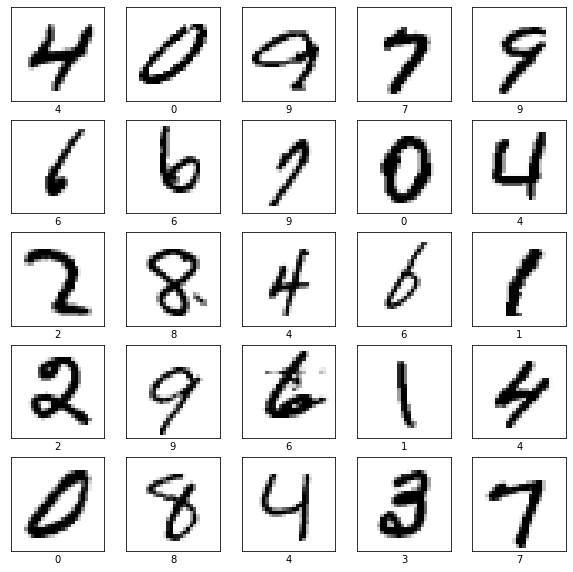

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(test_labels[i])
plt.show()

### Export the predictions

In [ ]:
test_file_5 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Analytics Vidhya/digit recognizer/Test.csv')
test_file_5['label'] = test_labels
test_file_5.head()

,filename,label
0,49000.png,4
1,49001.png,0
2,49002.png,9
3,49003.png,7
4,49004.png,9


In [ ]:
test_file_5.to_csv('Test File 5.csv', index=False)

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
dense (Dense)                (None, 448)               351680    
_________________________________________________________________
dense_1 (Dense)              (None, 448)               201152    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                4490      
Total params: 560,458
Trainable params: 558,890
Non-trainable params: 1,568
_________________________________________________________________
None


## Build Model 5 - Hyperparameters

In [ ]:
!pip install -q -U keras-tuner

import kerastuner as kt
import IPython

In [ ]:
def model_builder(hp):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(28, 28)))

  # Tune the number of units in the first two Dense layers
  # Choose an optimal value between 62-1024
  hp_units = hp.Int('units', min_value = 64, max_value = 1024, step = 32)
  model.add(keras.layers.Dense(units = hp_units, activation = 'relu'))
  model.add(keras.layers.Dense(units=hp_units, activation='relu'))
  model.add(keras.layers.Dense(units=hp_units, activation='relu'))
  model.add(keras.layers.Dense(10, activation='softmax'))

  # Tune the learning rate for the optimizer 
  # Choose an optimal value from 0.01, 0.001, or 0.0001
  hp_learning_rate = hp.Choice('learning_rate', values = [1e-2, 1e-3, 1e-4]) 
  
  model.compile(optimizer = keras.optimizers.Adam(learning_rate = hp_learning_rate),
                loss = keras.losses.SparseCategoricalCrossentropy(from_logits = True), 
                metrics = ['accuracy'])
  
  return model

In [ ]:
tuner = kt.Hyperband(model_builder,
                     objective = 'val_accuracy', 
                     max_epochs = 10,
                     factor = 3,
                     directory = '/content/drive/My Drive/Colab Notebooks/100daysdl',
                     project_name = 'Day 40 - KT Digit Classification with regularization')

In [ ]:
tuner.search(train_images, train_labels, 
             epochs = 10, 
             validation_split = 0.2,
             batch_size = 500)

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials = 1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")

Epoch 1/2
79/79 [==============================] - 11s 145ms/step - loss: 1.8813 - accuracy: 0.6673 - val_loss: 1.6493 - val_accuracy: 0.8291
Epoch 2/2
79/79 [==============================] - 11s 145ms/step - loss: 1.5879 - accuracy: 0.8931 - val_loss: 1.5611 - val_accuracy: 0.9142


Epoch 1/2
79/79 [==============================] - 5s 62ms/step - loss: 1.6942 - accuracy: 0.7829 - val_loss: 1.6170 - val_accuracy: 0.8442
Epoch 2/2
79/79 [==============================] - 5s 60ms/step - loss: 1.5987 - accuracy: 0.8639 - val_loss: 1.5946 - val_accuracy: 0.8676


Epoch 1/2
79/79 [==============================] - 8s 107ms/step - loss: 1.9278 - accuracy: 0.6237 - val_loss: 1.6727 - val_accuracy: 0.8154
Epoch 2/2
79/79 [==============================] - 8s 102ms/step - loss: 1.6114 - accuracy: 0.8724 - val_loss: 1.5687 - val_accuracy: 0.9109


Epoch 1/2
79/79 [==============================] - 15s 193ms/step - loss: 2.3679 - accuracy: 0.0922 - val_loss: 2.3709 - val_accuracy: 0.0902
Epoch 2/2
79/79 [==============================] - 15s 189ms/step - loss: 2.3710 - accuracy: 0.0902 - val_loss: 2.3709 - val_accuracy: 0.0902


Epoch 1/2
79/79 [==============================] - 4s 45ms/step - loss: 2.3441 - accuracy: 0.1162 - val_loss: 2.3517 - val_accuracy: 0.1095
Epoch 2/2
79/79 [==============================] - 3s 42ms/step - loss: 2.3479 - accuracy: 0.1133 - val_loss: 2.3517 - val_accuracy: 0.1095


Epoch 1/2
79/79 [==============================] - 3s 37ms/step - loss: 2.0926 - accuracy: 0.5027 - val_loss: 1.7783 - val_accuracy: 0.7953
Epoch 2/2
79/79 [==============================] - 3s 37ms/step - loss: 1.6503 - accuracy: 0.8707 - val_loss: 1.6004 - val_accuracy: 0.8965


Epoch 1/2
79/79 [==============================] - 15s 190ms/step - loss: 1.6202 - accuracy: 0.8534 - val_loss: 1.5292 - val_accuracy: 0.9332
Epoch 2/2
79/79 [==============================] - 15s 188ms/step - loss: 1.5171 - accuracy: 0.9458 - val_loss: 1.5205 - val_accuracy: 0.9405


Epoch 1/2
79/79 [==============================] - 13s 162ms/step - loss: 1.6151 - accuracy: 0.8575 - val_loss: 1.5412 - val_accuracy: 0.9216
Epoch 2/2
79/79 [==============================] - 13s 159ms/step - loss: 1.5175 - accuracy: 0.9456 - val_loss: 1.5147 - val_accuracy: 0.9479


Epoch 1/2
79/79 [==============================] - 7s 94ms/step - loss: 1.6253 - accuracy: 0.8536 - val_loss: 1.5335 - val_accuracy: 0.9306
Epoch 2/2
79/79 [==============================] - 8s 96ms/step - loss: 1.5203 - accuracy: 0.9430 - val_loss: 1.5188 - val_accuracy: 0.9441


Epoch 1/2
79/79 [==============================] - 2s 20ms/step - loss: 2.2181 - accuracy: 0.2700 - val_loss: 2.0588 - val_accuracy: 0.5228
Epoch 2/2
79/79 [==============================] - 1s 18ms/step - loss: 1.8386 - accuracy: 0.7357 - val_loss: 1.6916 - val_accuracy: 0.8457


Epoch 1/2
79/79 [==============================] - 4s 51ms/step - loss: 1.6493 - accuracy: 0.8411 - val_loss: 1.5462 - val_accuracy: 0.9187
Epoch 2/2
79/79 [==============================] - 4s 49ms/step - loss: 1.5286 - accuracy: 0.9360 - val_loss: 1.5247 - val_accuracy: 0.9392


Epoch 1/2
79/79 [==============================] - 4s 48ms/step - loss: 2.0415 - accuracy: 0.5294 - val_loss: 1.7173 - val_accuracy: 0.8374
Epoch 2/2
79/79 [==============================] - 4s 47ms/step - loss: 1.6214 - accuracy: 0.8846 - val_loss: 1.5865 - val_accuracy: 0.9020


Epoch 3/4
79/79 [==============================] - 13s 166ms/step - loss: 1.6196 - accuracy: 0.8511 - val_loss: 1.5326 - val_accuracy: 0.9313
Epoch 4/4
79/79 [==============================] - 13s 166ms/step - loss: 1.5165 - accuracy: 0.9462 - val_loss: 1.5130 - val_accuracy: 0.9495


Epoch 3/4
79/79 [==============================] - 7s 93ms/step - loss: 1.6904 - accuracy: 0.7825 - val_loss: 1.5425 - val_accuracy: 0.9219
Epoch 4/4
79/79 [==============================] - 7s 92ms/step - loss: 1.5249 - accuracy: 0.9393 - val_loss: 1.5147 - val_accuracy: 0.9479


Epoch 3/4
79/79 [==============================] - 15s 194ms/step - loss: 1.6117 - accuracy: 0.8619 - val_loss: 1.5365 - val_accuracy: 0.9259
Epoch 4/4
79/79 [==============================] - 15s 196ms/step - loss: 1.5170 - accuracy: 0.9460 - val_loss: 1.5116 - val_accuracy: 0.9499


Epoch 3/4
79/79 [==============================] - 4s 51ms/step - loss: 1.6407 - accuracy: 0.8428 - val_loss: 1.5508 - val_accuracy: 0.9160
Epoch 4/4
79/79 [==============================] - 4s 48ms/step - loss: 1.5257 - accuracy: 0.9389 - val_loss: 1.5200 - val_accuracy: 0.9434


Epoch 5/10
79/79 [==============================] - 16s 197ms/step - loss: 1.6074 - accuracy: 0.8681 - val_loss: 1.5365 - val_accuracy: 0.9261
Epoch 6/10
79/79 [==============================] - 15s 196ms/step - loss: 1.5191 - accuracy: 0.9436 - val_loss: 1.5204 - val_accuracy: 0.9414
Epoch 7/10
79/79 [==============================] - 16s 197ms/step - loss: 1.5019 - accuracy: 0.9603 - val_loss: 1.5131 - val_accuracy: 0.9496
Epoch 8/10
79/79 [==============================] - 15s 191ms/step - loss: 1.4962 - accuracy: 0.9656 - val_loss: 1.5001 - val_accuracy: 0.9614
Epoch 9/10
79/79 [==============================] - 15s 191ms/step - loss: 1.4896 - accuracy: 0.9721 - val_loss: 1.4970 - val_accuracy: 0.9648
Epoch 10/10
79/79 [==============================] - 15s 195ms/step - loss: 1.4867 - accuracy: 0.9749 - val_loss: 1.4938 - val_accuracy: 0.9682


Epoch 5/10
79/79 [==============================] - 13s 167ms/step - loss: 1.6673 - accuracy: 0.8057 - val_loss: 1.6076 - val_accuracy: 0.8536
Epoch 6/10
79/79 [==============================] - 13s 163ms/step - loss: 1.5990 - accuracy: 0.8626 - val_loss: 1.5946 - val_accuracy: 0.8658
Epoch 7/10
79/79 [==============================] - 13s 164ms/step - loss: 1.5500 - accuracy: 0.9120 - val_loss: 1.5148 - val_accuracy: 0.9477
Epoch 8/10
79/79 [==============================] - 13s 160ms/step - loss: 1.4995 - accuracy: 0.9620 - val_loss: 1.5163 - val_accuracy: 0.9455
Epoch 9/10
79/79 [==============================] - 13s 163ms/step - loss: 1.4944 - accuracy: 0.9674 - val_loss: 1.5069 - val_accuracy: 0.9550
Epoch 10/10
79/79 [==============================] - 13s 160ms/step - loss: 1.4891 - accuracy: 0.9727 - val_loss: 1.4994 - val_accuracy: 0.9612


Epoch 1/4
79/79 [==============================] - 5s 68ms/step - loss: 1.9994 - accuracy: 0.6189 - val_loss: 1.7401 - val_accuracy: 0.7424
Epoch 2/4
79/79 [==============================] - 5s 65ms/step - loss: 1.6640 - accuracy: 0.8242 - val_loss: 1.5997 - val_accuracy: 0.8929
Epoch 3/4
79/79 [==============================] - 5s 66ms/step - loss: 1.5682 - accuracy: 0.9137 - val_loss: 1.5594 - val_accuracy: 0.9173
Epoch 4/4
79/79 [==============================] - 5s 64ms/step - loss: 1.5459 - accuracy: 0.9289 - val_loss: 1.5469 - val_accuracy: 0.9258


Epoch 1/4
79/79 [==============================] - 3s 39ms/step - loss: 1.7178 - accuracy: 0.7610 - val_loss: 1.6188 - val_accuracy: 0.8441
Epoch 2/4
79/79 [==============================] - 3s 37ms/step - loss: 1.6111 - accuracy: 0.8518 - val_loss: 1.6092 - val_accuracy: 0.8520
Epoch 3/4
79/79 [==============================] - 3s 38ms/step - loss: 1.5978 - accuracy: 0.8650 - val_loss: 1.5956 - val_accuracy: 0.8657
Epoch 4/4
79/79 [==============================] - 3s 38ms/step - loss: 1.5901 - accuracy: 0.8715 - val_loss: 1.5897 - val_accuracy: 0.8717


Epoch 1/4
79/79 [==============================] - 13s 160ms/step - loss: 2.3615 - accuracy: 0.0983 - val_loss: 2.3649 - val_accuracy: 0.0962
Epoch 2/4
79/79 [==============================] - 12s 158ms/step - loss: 2.3633 - accuracy: 0.0978 - val_loss: 2.3649 - val_accuracy: 0.0962
Epoch 3/4
79/79 [==============================] - 12s 154ms/step - loss: 2.3633 - accuracy: 0.0978 - val_loss: 2.3649 - val_accuracy: 0.0962
Epoch 4/4
79/79 [==============================] - 12s 150ms/step - loss: 2.3633 - accuracy: 0.0978 - val_loss: 2.3649 - val_accuracy: 0.0962


Epoch 1/4
79/79 [==============================] - 2s 23ms/step - loss: 2.1774 - accuracy: 0.3549 - val_loss: 1.9731 - val_accuracy: 0.6310
Epoch 2/4
79/79 [==============================] - 2s 21ms/step - loss: 1.7623 - accuracy: 0.8041 - val_loss: 1.6504 - val_accuracy: 0.8713
Epoch 3/4
79/79 [==============================] - 2s 21ms/step - loss: 1.6117 - accuracy: 0.8924 - val_loss: 1.5972 - val_accuracy: 0.8955
Epoch 4/4
79/79 [==============================] - 2s 21ms/step - loss: 1.5795 - accuracy: 0.9074 - val_loss: 1.5778 - val_accuracy: 0.9038


Epoch 1/4
79/79 [==============================] - 1s 14ms/step - loss: 1.6287 - accuracy: 0.8349 - val_loss: 1.5470 - val_accuracy: 0.9157
Epoch 2/4
79/79 [==============================] - 1s 12ms/step - loss: 1.5336 - accuracy: 0.9277 - val_loss: 1.5277 - val_accuracy: 0.9334
Epoch 3/4
79/79 [==============================] - 1s 12ms/step - loss: 1.5246 - accuracy: 0.9364 - val_loss: 1.5216 - val_accuracy: 0.9396
Epoch 4/4
79/79 [==============================] - 1s 11ms/step - loss: 1.5178 - accuracy: 0.9435 - val_loss: 1.5224 - val_accuracy: 0.9384


Epoch 1/4
79/79 [==============================] - 12s 152ms/step - loss: 1.6298 - accuracy: 0.8431 - val_loss: 1.5378 - val_accuracy: 0.9246
Epoch 2/4
79/79 [==============================] - 12s 147ms/step - loss: 1.5188 - accuracy: 0.9438 - val_loss: 1.5124 - val_accuracy: 0.9505
Epoch 3/4
79/79 [==============================] - 12s 152ms/step - loss: 1.5024 - accuracy: 0.9599 - val_loss: 1.5099 - val_accuracy: 0.9517
Epoch 4/4
79/79 [==============================] - 12s 151ms/step - loss: 1.4934 - accuracy: 0.9685 - val_loss: 1.4987 - val_accuracy: 0.9627


Epoch 5/10
79/79 [==============================] - 12s 150ms/step - loss: 1.6177 - accuracy: 0.8540 - val_loss: 1.5358 - val_accuracy: 0.9277
Epoch 6/10
79/79 [==============================] - 12s 152ms/step - loss: 1.5154 - accuracy: 0.9473 - val_loss: 1.5088 - val_accuracy: 0.9527
Epoch 7/10
79/79 [==============================] - 12s 150ms/step - loss: 1.5001 - accuracy: 0.9628 - val_loss: 1.5055 - val_accuracy: 0.9572
Epoch 8/10
79/79 [==============================] - 12s 153ms/step - loss: 1.4935 - accuracy: 0.9686 - val_loss: 1.4980 - val_accuracy: 0.9638
Epoch 9/10
79/79 [==============================] - 11s 145ms/step - loss: 1.4892 - accuracy: 0.9728 - val_loss: 1.4986 - val_accuracy: 0.9627
Epoch 10/10
79/79 [==============================] - 11s 143ms/step - loss: 1.4846 - accuracy: 0.9771 - val_loss: 1.4987 - val_accuracy: 0.9633


Epoch 5/10
79/79 [==============================] - 1s 14ms/step - loss: 1.6909 - accuracy: 0.7757 - val_loss: 1.6237 - val_accuracy: 0.8364
Epoch 6/10
79/79 [==============================] - 1s 11ms/step - loss: 1.6096 - accuracy: 0.8506 - val_loss: 1.6072 - val_accuracy: 0.8533
Epoch 7/10
79/79 [==============================] - 1s 13ms/step - loss: 1.5778 - accuracy: 0.8828 - val_loss: 1.5283 - val_accuracy: 0.9333
Epoch 8/10
79/79 [==============================] - 1s 12ms/step - loss: 1.5242 - accuracy: 0.9365 - val_loss: 1.5261 - val_accuracy: 0.9350
Epoch 9/10
79/79 [==============================] - 1s 11ms/step - loss: 1.5258 - accuracy: 0.9350 - val_loss: 1.5372 - val_accuracy: 0.9236
Epoch 10/10
79/79 [==============================] - 1s 11ms/step - loss: 1.5270 - accuracy: 0.9341 - val_loss: 1.5463 - val_accuracy: 0.9146


Epoch 1/10
79/79 [==============================] - 3s 42ms/step - loss: 2.0676 - accuracy: 0.5177 - val_loss: 1.7526 - val_accuracy: 0.7771
Epoch 2/10
79/79 [==============================] - 3s 40ms/step - loss: 1.6502 - accuracy: 0.8575 - val_loss: 1.5934 - val_accuracy: 0.8999
Epoch 3/10
79/79 [==============================] - 3s 40ms/step - loss: 1.5722 - accuracy: 0.9116 - val_loss: 1.5650 - val_accuracy: 0.9163
Epoch 4/10
79/79 [==============================] - 3s 39ms/step - loss: 1.5522 - accuracy: 0.9250 - val_loss: 1.5519 - val_accuracy: 0.9246
Epoch 5/10
79/79 [==============================] - 3s 39ms/step - loss: 1.5415 - accuracy: 0.9319 - val_loss: 1.5432 - val_accuracy: 0.9290
Epoch 6/10
79/79 [==============================] - 3s 39ms/step - loss: 1.5337 - accuracy: 0.9380 - val_loss: 1.5386 - val_accuracy: 0.9318
Epoch 7/10
79/79 [==============================] - 3s 41ms/step - loss: 1.5272 - accuracy: 0.9436 - val_loss: 1.5316 - val_accuracy: 0.9383
Epoch 8/10
79

Epoch 1/10
79/79 [==============================] - 2s 25ms/step - loss: 1.7025 - accuracy: 0.7956 - val_loss: 1.5563 - val_accuracy: 0.9099
Epoch 2/10
79/79 [==============================] - 2s 20ms/step - loss: 1.5356 - accuracy: 0.9310 - val_loss: 1.5295 - val_accuracy: 0.9356
Epoch 3/10
79/79 [==============================] - 2s 22ms/step - loss: 1.5189 - accuracy: 0.9466 - val_loss: 1.5239 - val_accuracy: 0.9406
Epoch 4/10
79/79 [==============================] - 2s 21ms/step - loss: 1.5084 - accuracy: 0.9560 - val_loss: 1.5131 - val_accuracy: 0.9512
Epoch 5/10
79/79 [==============================] - 2s 21ms/step - loss: 1.5016 - accuracy: 0.9624 - val_loss: 1.5104 - val_accuracy: 0.9532
Epoch 6/10
79/79 [==============================] - 2s 22ms/step - loss: 1.4965 - accuracy: 0.9671 - val_loss: 1.5051 - val_accuracy: 0.9577
Epoch 7/10
79/79 [==============================] - 2s 21ms/step - loss: 1.4921 - accuracy: 0.9710 - val_loss: 1.5044 - val_accuracy: 0.9572
Epoch 8/10
79

Epoch 1/10
79/79 [==============================] - 14s 176ms/step - loss: 1.8281 - accuracy: 0.7459 - val_loss: 1.5872 - val_accuracy: 0.8960
Epoch 2/10
79/79 [==============================] - 14s 174ms/step - loss: 1.5581 - accuracy: 0.9187 - val_loss: 1.5479 - val_accuracy: 0.9258
Epoch 3/10
79/79 [==============================] - 14s 178ms/step - loss: 1.5349 - accuracy: 0.9353 - val_loss: 1.5338 - val_accuracy: 0.9355
Epoch 4/10
79/79 [==============================] - 14s 178ms/step - loss: 1.5226 - accuracy: 0.9461 - val_loss: 1.5245 - val_accuracy: 0.9429
Epoch 5/10
79/79 [==============================] - 14s 175ms/step - loss: 1.5134 - accuracy: 0.9545 - val_loss: 1.5186 - val_accuracy: 0.9484
Epoch 6/10
79/79 [==============================] - 14s 174ms/step - loss: 1.5069 - accuracy: 0.9604 - val_loss: 1.5134 - val_accuracy: 0.9521
Epoch 7/10
79/79 [==============================] - 14s 171ms/step - loss: 1.5024 - accuracy: 0.9643 - val_loss: 1.5092 - val_accuracy: 0.9561

Epoch 1/10
79/79 [==============================] - 4s 53ms/step - loss: 2.3416 - accuracy: 0.1190 - val_loss: 2.3517 - val_accuracy: 0.1095
Epoch 2/10
79/79 [==============================] - 4s 49ms/step - loss: 2.3479 - accuracy: 0.1133 - val_loss: 2.3517 - val_accuracy: 0.1095
Epoch 3/10
79/79 [==============================] - 4s 52ms/step - loss: 2.3479 - accuracy: 0.1133 - val_loss: 2.3517 - val_accuracy: 0.1095
Epoch 4/10
79/79 [==============================] - 4s 51ms/step - loss: 2.3479 - accuracy: 0.1133 - val_loss: 2.3517 - val_accuracy: 0.1095
Epoch 5/10
79/79 [==============================] - 4s 49ms/step - loss: 2.3479 - accuracy: 0.1133 - val_loss: 2.3517 - val_accuracy: 0.1095
Epoch 6/10
79/79 [==============================] - 4s 52ms/step - loss: 2.3479 - accuracy: 0.1133 - val_loss: 2.3517 - val_accuracy: 0.1095
Epoch 7/10
79/79 [==============================] - 4s 48ms/step - loss: 2.3479 - accuracy: 0.1133 - val_loss: 2.3517 - val_accuracy: 0.1095
Epoch 8/10
79

INFO:tensorflow:Oracle triggered exit

The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 1024 and the optimal learning rate for the optimizer
is 0.001.



In [ ]:
# Build the model with the optimal hyperparameters and train it on the data
model = tuner.hypermodel.build(best_hps)
model.fit(train_images, train_labels, epochs = 10, validation_split = 0.2, batch_size = 500)

Epoch 1/10
79/79 [==============================] - 15s 190ms/step - loss: 1.6027 - accuracy: 0.8689 - val_loss: 1.5296 - val_accuracy: 0.9337
Epoch 2/10
79/79 [==============================] - 15s 191ms/step - loss: 1.5152 - accuracy: 0.9469 - val_loss: 1.5119 - val_accuracy: 0.9506
Epoch 3/10
79/79 [==============================] - 15s 191ms/step - loss: 1.5009 - accuracy: 0.9614 - val_loss: 1.5025 - val_accuracy: 0.9592
Epoch 4/10
79/79 [==============================] - 15s 190ms/step - loss: 1.4943 - accuracy: 0.9679 - val_loss: 1.5022 - val_accuracy: 0.9601
Epoch 5/10
79/79 [==============================] - 15s 193ms/step - loss: 1.4919 - accuracy: 0.9701 - val_loss: 1.4998 - val_accuracy: 0.9613
Epoch 6/10
79/79 [==============================] - 15s 191ms/step - loss: 1.4877 - accuracy: 0.9740 - val_loss: 1.4996 - val_accuracy: 0.9620
Epoch 7/10
79/79 [==============================] - 15s 188ms/step - loss: 1.4849 - accuracy: 0.9766 - val_loss: 1.4940 - val_accuracy: 0.9670

### Evaluating training accuracy

In [ ]:
train_loss, train_acc = model.evaluate(train_images,  train_labels, verbose=2)

print('\nTraining accuracy:', train_acc)

1532/1532 - 11s - loss: 1.4783 - accuracy: 0.9830

Training accuracy: 0.9829999804496765


### Making predictions

In [ ]:
predictions = model.predict(test_images)

In [ ]:
np.argmax(predictions[0])

4

In [ ]:
test_labels = []
for i in range(len(predictions)):
  test_labels.append(np.argmax(predictions[i]))

### Verify the predictions

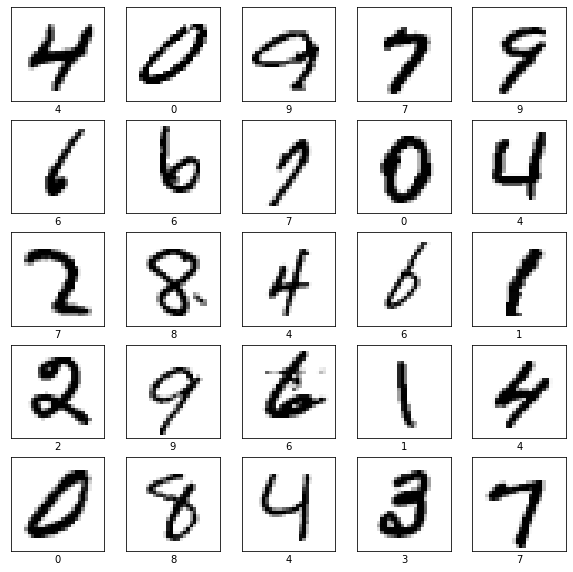

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(test_labels[i])
plt.show()

### Export the predictions

In [ ]:
test_file_6 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Analytics Vidhya/digit recognizer/Test.csv')
test_file_6['label'] = test_labels
test_file_6.head()

,filename,label
0,49000.png,4
1,49001.png,0
2,49002.png,9
3,49003.png,7
4,49004.png,9


In [ ]:
test_file_6.to_csv('Test File 6.csv', index=False)

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 1024)              803840    
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_3 (Dense)              (None, 10)                10250     
Total params: 2,913,290
Trainable params: 2,913,290
Non-trainable params: 0
_________________________________________________________________
None
